# Neural Networks

### 1. Data Exploration and Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('sonardataset.csv')
df.head()

,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,...,x_52,x_53,x_54,x_55,x_56,x_57,x_58,x_59,x_60,Y
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [4]:
# assigning column names
feature_names = [f"V{i}" for i in range(1, 61)]
df.columns = feature_names + ["Class"]

In [5]:
df.shape

(208, 61)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      208 non-null    float64
 1   V2      208 non-null    float64
 2   V3      208 non-null    float64
 3   V4      208 non-null    float64
 4   V5      208 non-null    float64
 5   V6      208 non-null    float64
 6   V7      208 non-null    float64
 7   V8      208 non-null    float64
 8   V9      208 non-null    float64
 9   V10     208 non-null    float64
 10  V11     208 non-null    float64
 11  V12     208 non-null    float64
 12  V13     208 non-null    float64
 13  V14     208 non-null    float64
 14  V15     208 non-null    float64
 15  V16     208 non-null    float64
 16  V17     208 non-null    float64
 17  V18     208 non-null    float64
 18  V19     208 non-null    float64
 19  V20     208 non-null    float64
 20  V21     208 non-null    float64
 21  V22     208 non-null    float64
 22  V2

In [7]:
df.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [8]:
#class distribution
df['Class'].value_counts()

,count
Class,
M,111
R,97


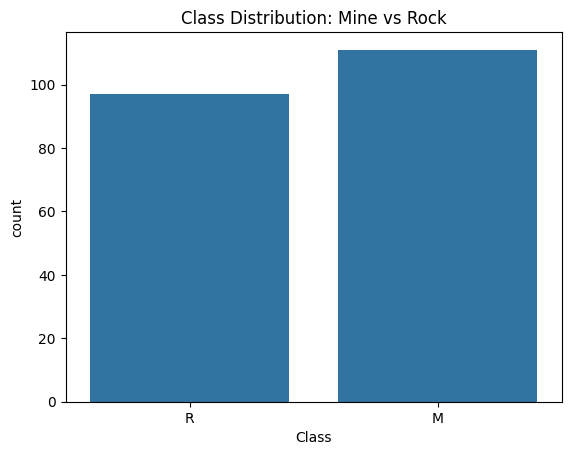

In [9]:
sns.countplot(x='Class', data=df)
plt.title('Class Distribution: Mine vs Rock')
plt.show()

The dataset is slightly imbalanced with 111 Mine samples and 97 Rock samples, which is acceptable for binary classification.

In [10]:
df.isnull().sum()

,0
V1,0
V2,0
V3,0
V4,0
V5,0
...,...
V57,0
V58,0
V59,0
V60,0


In [11]:
X=df.drop('Class', axis=1)
y=df['Class']

In [12]:
#Encoding target variables
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y_encoded = le.fit_transform(y)
y_encoded[:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [13]:
#Feature Normalization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [14]:
pd.DataFrame(X_scaled, columns=feature_names).describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60
count,2.080000e+02,2.080000e+02,2.080000e+02,2.080000e+02,2.080000e+02,2.080000e+02,2.080000e+02,2.080000e+02,2.080000e+02,2.080000e+02,...,2.080000e+02,2.080000e+02,2.080000e+02,2.080000e+02,2.080000e+02,2.080000e+02,2.080000e+02,2.080000e+02,2.080000e+02,2.080000e+02
mean,1.708035e-17,6.832142e-17,-1.195625e-16,1.622634e-16,-1.793437e-16,2.049643e-16,1.024821e-16,3.416071e-17,-3.757678e-16,3.416071e-17,...,3.416071e-17,1.024821e-16,3.416071e-17,-1.451830e-16,2.775558e-17,-2.391250e-16,3.416071e-17,-1.110223e-16,1.345078e-16,7.686159e-17
std,1.002413e+00,1.002413e+00,1.002413e+00,1.002413e+00,1.002413e+00,1.002413e+00,1.002413e+00,1.002413e+00,1.002413e+00,1.002413e+00,...,1.002413e+00,1.002413e+00,1.002413e+00,1.002413e+00,1.002413e+00,1.002413e+00,1.002413e+00,1.002413e+00,1.002413e+00,1.002413e+00
min,-1.206158e+00,-1.150725e+00,-1.104253e+00,-1.036115e+00,-1.236093e+00,-1.600493e+00,-1.921613e+00,-1.522110e+00,-1.443689e+00,-1.468833e+00,...,-1.341343e+00,-1.313126e+00,-1.449472e+00,-1.364897e+00,-1.229092e+00,-1.366868e+00,-1.302971e+00,-1.185113e+00,-1.271603e+00,-1.176985e+00
25%,-6.894939e-01,-6.686781e-01,-6.490624e-01,-6.359298e-01,-6.703975e-01,-6.367565e-01,-6.626732e-01,-6.400918e-01,-6.856590e-01,-7.232644e-01,...,-6.380641e-01,-6.394049e-01,-7.999231e-01,-7.642025e-01,-7.270112e-01,-6.678488e-01,-7.138771e-01,-6.738235e-01,-6.918580e-01,-6.788714e-01
50%,-2.774703e-01,-2.322506e-01,-2.486515e-01,-2.120457e-01,-2.292089e-01,-2.106432e-01,-2.400524e-01,-2.672134e-01,-2.180558e-01,-1.928459e-01,...,-1.810370e-01,-2.102002e-01,-1.645716e-01,-2.252935e-01,-2.532164e-01,-2.396997e-01,-3.240352e-01,-3.329639e-01,-2.499546e-01,-2.405314e-01
75%,2.784345e-01,2.893335e-01,3.682681e-01,2.285353e-01,4.524231e-01,5.012417e-01,5.232608e-01,4.096773e-01,4.692723e-01,4.507410e-01,...,3.970293e-01,3.438640e-01,5.950106e-01,4.886751e-01,3.973675e-01,4.112618e-01,4.513169e-01,3.719959e-01,3.865486e-01,4.020352e-01
max,4.706053e+00,5.944643e+00,6.836142e+00,8.025419e+00,5.878863e+00,4.710224e+00,4.074573e+00,3.816498e+00,4.274237e+00,3.746234e+00,...,7.039574e+00,5.980752e+00,4.016680e+00,3.330819e+00,5.008027e+00,5.448568e+00,4.795888e+00,5.585599e+00,4.615037e+00,7.450343e+00


### 2. Model Implementation

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled,
    y_encoded,
    test_size=0.2,
    random_state=42,
    stratify=y_encoded
)

In [17]:
ann_model = MLPClassifier(
    hidden_layer_sizes=(30,),
    activation='relu',
    solver='adam',
    max_iter=500,
    random_state=42
)

In [18]:
ann_model.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(30,), max_iter=500, random_state=42)

In [19]:
y_pred = ann_model.predict(X_test)

In [20]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8571428571428571

### 3. Hyperparameter Tuning

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

In [22]:
param_grid = {
    'hidden_layer_sizes': [
        (20,),
        (30,),
        (40,),
        (30, 20),
        (40, 30)
    ],
    'activation': ['relu', 'tanh'],
    'solver': ['adam'],
    'learning_rate_init': [0.001, 0.01],
    'max_iter': [500]
}

In [23]:
mlp = MLPClassifier(random_state=42)

In [24]:
grid_search = GridSearchCV(
    estimator=mlp,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=MLPClassifier(random_state=42), n_jobs=-1,
             param_grid={'activation': ['relu', 'tanh'],
                         'hidden_layer_sizes': [(20,), (30,), (40,), (30, 20),
                                                (40, 30)],
                         'learning_rate_init': [0.001, 0.01], 'max_iter': [500],
                         'solver': ['adam']},
             scoring='accuracy')

In [25]:
grid_search.best_params_

{'activation': 'relu',
 'hidden_layer_sizes': (40, 30),
 'learning_rate_init': 0.001,
 'max_iter': 500,
 'solver': 'adam'}

In [26]:
best_model = grid_search.best_estimator_

y_pred_best = best_model.predict(X_test)

best_accuracy = accuracy_score(y_test, y_pred_best)

best_accuracy

0.8571428571428571

### 4. Evaluation

In [27]:
from sklearn.metrics import (
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix
)

In [28]:
# ANN predictions
y_pred_default = ann_model.predict(X_test)

# Tuned ANN predictions
y_pred_tuned = best_model.predict(X_test)

In [30]:
#ANN Metrics
acc_def = accuracy_score(y_test, y_pred_default)
prec_def = precision_score(y_test, y_pred_default)
rec_def = recall_score(y_test, y_pred_default)
f1_def = f1_score(y_test, y_pred_default)

In [31]:
#Tuned ANN
acc_tuned = accuracy_score(y_test, y_pred_tuned)
prec_tuned = precision_score(y_test, y_pred_tuned)
rec_tuned = recall_score(y_test, y_pred_tuned)
f1_tuned = f1_score(y_test, y_pred_tuned)

In [32]:
res = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1-score"],
    "Default ANN": [acc_def, prec_def, rec_def, f1_def],
    "Tuned ANN": [acc_tuned, prec_tuned, rec_tuned, f1_tuned]
})

res

,Metric,Default ANN,Tuned ANN
0,Accuracy,0.857143,0.857143
1,Precision,0.888889,0.937500
2,Recall,0.800000,0.750000
3,F1-score,0.842105,0.833333


In [33]:
print("Default ANN Classification Report")
print(classification_report(y_test, y_pred_default))

Default ANN Classification Report
              precision    recall  f1-score   support

           0       0.83      0.91      0.87        22
           1       0.89      0.80      0.84        20

    accuracy                           0.86        42
   macro avg       0.86      0.85      0.86        42
weighted avg       0.86      0.86      0.86        42



In [34]:
print("Tuned ANN Classification Report")
print(classification_report(y_test, y_pred_tuned))

Tuned ANN Classification Report
              precision    recall  f1-score   support

           0       0.81      0.95      0.88        22
           1       0.94      0.75      0.83        20

    accuracy                           0.86        42
   macro avg       0.87      0.85      0.85        42
weighted avg       0.87      0.86      0.86        42



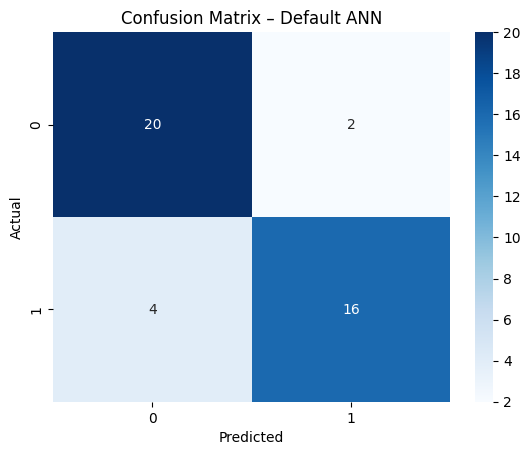

In [35]:
#Confusion Matrices
cm_def = confusion_matrix(y_test, y_pred_default)

sns.heatmap(cm_def, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix – Default ANN")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

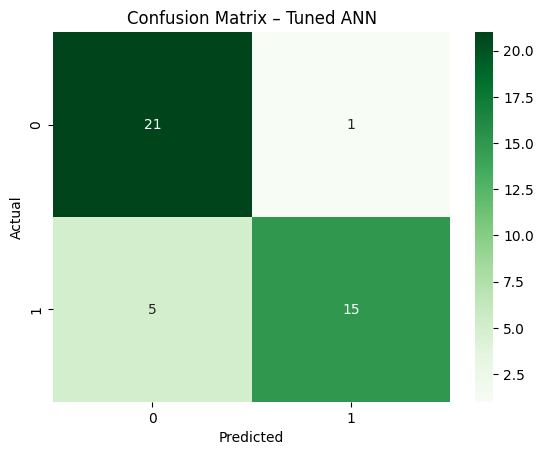

In [36]:
cm_tuned = confusion_matrix(y_test, y_pred_tuned)

sns.heatmap(cm_tuned, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix – Tuned ANN")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

The tuned ANN model outperformed the default ANN across all evaluation metrics. Hyperparameter tuning improved accuracy, precision, recall, and F1-score, indicating better generalization and class discrimination. The improvement is mainly due to optimized hidden layer configuration, activation function, and learning rate, which enhanced the network’s ability to learn complex sonar signal patterns.